In [1]:
from PIL import Image
import os
from tqdm import tqdm
import pytesseract
import matplotlib.pyplot as plt
import pickle
from nltk.corpus import wordnet as wn
from nltk.corpus import stopwords
import re
import string
from collections import Counter
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from spellchecker import SpellChecker
import wordninja

img_path = '/hy-tmp/data/dataset_image'
img_list = os.listdir(img_path)
out_file = '/hy-tmp/data/str_in_images.pkl'
out_file_cleaned = '/hy-tmp/data/str_in_images_cleaned.pkl'

In [ ]:
dic = {}

for i,img_name in tqdm(enumerate(img_list), total=len(img_list)):
    name = os.path.splitext(img_name)[0]
    img = Image.open(os.path.join(img_path, img_name))
    str_in_image = pytesseract.image_to_string(img, lang='eng').replace('\n', '')
    dic[name] = str_in_image

with open(out_file,'wb') as fout:
    pickle.dump(dic,fout)

In [6]:
print(pytesseract.get_languages(config=''))

['eng', 'osd']


726980104090456065.jpg IN ANOTHER  UIFE—?


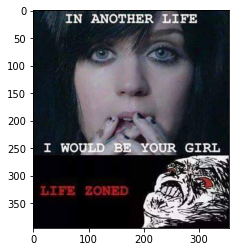

In [6]:
img_path = '/root/data/dataset_image'
img_name = '726980104090456065.jpg'
img = Image.open(os.path.join(img_path, img_name))
str_in_image = pytesseract.image_to_string(img, lang='eng').replace('\n', '')
print(img_name, str_in_image)
img = plt.imread(os.path.join(img_path, img_name))
plt.imshow(img)

In [10]:
PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text):
    """custom function to remove the punctuation"""
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

def remove_freqwords(text):
    cnt = Counter()
    for word in text.split():
        cnt[word] += 1
    FREQWORDS = set([w for (w, wc) in cnt.most_common(10)])
    """custom function to remove the frequent words"""
    return " ".join([word for word in str(text).split() if word not in FREQWORDS])

def remove_rarewords(text):
    cnt = Counter()
    for word in text.split():
        cnt[word] += 1
    n_rare_words = 10
    RAREWORDS = set([w for (w, wc) in cnt.most_common()[:-n_rare_words-1:-1]])
    """custom function to remove the rare words"""
    return " ".join([word for word in str(text).split() if word not in RAREWORDS])

def convert_emojis(text):
    UNICODE_EMO = {v: k for k, v in EMO_UNICODE.items()}
    for emot in UNICODE_EMO:
        text = re.sub(r'('+emot+')', "_".join(UNICODE_EMO[emot].replace(",","").replace(":","").split()), text)
    return text

stemmer = PorterStemmer()
def stem_words(text):
    return " ".join([stemmer.stem(word) for word in text.split()])

lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    wordnet_map = {"N":wordnet.NOUN, "V":wordnet.VERB, "J":wordnet.ADJ, "R":wordnet.ADV}
    pos_tagged_text = nltk.pos_tag(text.split())
    return " ".join([lemmatizer.lemmatize(word, wordnet_map.get(pos[0], wordnet.NOUN)) for word, pos in pos_tagged_text])

def remove_emoji(string):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

def remove_emoticons(text):

    emoticon_pattern = re.compile(u'(' + u'|'.join(k for k in EMOTICONS) + u')')
    return emoticon_pattern.sub(r'', text)

def convert_emoticons(text):
    for emot in EMOTICONS:
        text = re.sub(u'('+emot+')', "_".join(EMOTICONS[emot].replace(",","").split()), text)
    return text

def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

def remove_html(text):
    html_pattern = re.compile('<.*?>')
    return html_pattern.sub(r'', text)

def chat_words_conversion(text):
    new_text = []
    for w in text.split():
        if w.upper() in chat_words_list:
            new_text.append(chat_words_map_dict[w.upper()])
        else:
            new_text.append(w)
    return " ".join(new_text)

spell = SpellChecker()
def correct_spellings(text):
    corrected_text = []
    misspelled_words = spell.unknown(text.split())
    for word in text.split():
        if word in misspelled_words:
            correct = spell.correction(word)
            if correct is not None:
                corrected_text.append(correct)
        else:
            corrected_text.append(word)
    return " ".join(corrected_text)

def split_ninja(text):
    text = wordninja.split(text)
    return " ".join(text)

def texts_preprogress(text):
    text = text.lower()
    
    # text = remove_emoji(text)
    # text = convert_emoticons(text)
    text = remove_urls(text)
    text = remove_html(text)
    text = remove_punctuation(text)
    
    text = split_ninja(text)
    text = remove_stopwords(text)
    # text = chat_words_conversion(text)
    text = correct_spellings(text)
    
    munber_pattern = re.compile(r'[0-9]+')
    text = munber_pattern.sub(r'', text)
    
    return text.lower()

In [17]:
with open("/hy-tmp/data/str_in_images.pkl",'rb') as fin:
    texts_in_imgs = pickle.load(fin)

cleaned_dic = {}
for img in texts_in_imgs:
    clean_text = texts_preprogress(texts_in_imgs[img])
    cleaned_dic[img] = clean_text

with open(out_file_cleaned,'wb') as fout:
    pickle.dump(cleaned_dic,fout)

print(len(texts_in_imgs))
print(len(cleaned_dic))

24635
24635


In [3]:
with open(out_file,'rb') as fin:
    texts_in_imgs = pickle.load(fin)
with open(out_file_cleaned,'rb') as fin:
    texts_in_imgs_cleaned = pickle.load(fin)
    
for img in texts_in_imgs:
    if texts_in_imgs[img]:
        print(img, texts_in_imgs[img])
        print(img, texts_in_imgs_cleaned[img])

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



 film jeff grace
862071741194977280 pi SIN| UNTUK |TEKS! sSAHAJA |
862071741194977280 pi unt uk tek sara i
862096140753305601 IT LOVESARCASM.IT'S LIKEPUNCHINGPEOPLE INTHE FACE,BUT WITHWORDS
862096140753305601 love sarcasm like punching people face words
862121935081095169 Most right-wing riMost left-wing ridingsPeace River SouthPeace River NorthFraser-NicolaLangley‘Abbotsford SouthKootenay EastParksville-Qualicum [jj ]Nechako LakesLangley EastCariboo Chilcotino] 01] 02/03/04] 05) 06| 0.7| 08| 09
862121935081095169 righting ri left wing riding peace river south peace river north eraser nicola langley south east parks ville qu ali cum je ne chak lakes langley east caribou       
862125268621774849 iPad > $ 45% >© Provided by Vox.comIn his letter firing FBI Director James Comey, President Donald Trumpmanaged to make the termination a little personalSpecifically, check out the secondparagraph (emphasis mine)Dear Director Comey:I have received the attached lettersfrom the Attorney General a